In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [22]:
def read_labels_txt(label_path: 'path string'):
    file = open(label_path, 'r')
    info = file.readlines()
    file.close()
    bbox_list = []
    for data in info:
        bbox_data = data.rstrip().split()[1:] #includes all bbox data but 
        x_center,y_center,w,h = map(int, map(float, bbox_data))
        x = x_center-w//2
        y = y_center-h//2
        bbox_list.append( (x,y,w,h) )
    return bbox_list

In [23]:
read_labels_txt('serengeti/labels/training/im1.txt')

[(214, 626, 199, 167),
 (704, 685, 160, 134),
 (1026, 678, 153, 182),
 (1157, 650, 166, 255),
 (1445, 733, 223, 187),
 (1702, 786, 207, 140),
 (1751, 730, 175, 204),
 (1944, 721, 103, 239)]

In [24]:
def draw_boundingbox(img, bbox_data):
    x,y,w,h = bbox_data
    print(bbox_data)
    img = cv2.line(img,(x,y),(x+w,y),(0,255,0), 3)
    img = cv2.line(img,(x,y),(x,y+h),(0,255,0), 3)
    img = cv2.line(img,(x+w,y),(x+w,y+h),(0,255,0),3)
    img = cv2.line(img,(x,y+h),(x+w,y+h),(0,255,0),3)

In [25]:
def show_bbox(im_path, label_path):
    bbox_list = read_labels_txt(label_path)
    im = cv2.imread(im_path)
    for i in bbox_list:
        draw_boundingbox(im, i)
    plt.imshow(im)

(214, 626, 199, 167)
(704, 685, 160, 134)
(1026, 678, 153, 182)
(1157, 650, 166, 255)
(1445, 733, 223, 187)
(1702, 786, 207, 140)
(1751, 730, 175, 204)
(1944, 721, 103, 239)


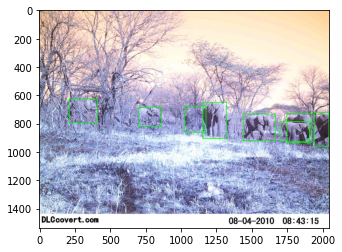

In [33]:
show_bbox('serengeti/images/training/im1.JPG', 'serengeti/labels/training/im1.txt')